In [2]:
import pandas as pd;
import requests;
from bs4 import BeautifulSoup;

In [3]:
import requests

# Test basic connectivity
try:
    test_response = requests.get("https://www.ambitionbox.com", timeout=5)
    print(f"Website accessible: {test_response.status_code}")
except:
    print("Website not accessible")

Website accessible: 403


'<!DOCTYPE html>\n<html\n  data-n-head-ssr\n  lang="en"\n  data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D"\n>\n  <head>\n    <meta charset="UTF-8" />\n    <meta\n      name="viewport"\n      content="width=device-width,initial-scale=1,minimum-scale=1"\n    />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <link rel="manifest" href="/assets/next/manifest.json" />\n    <style>\n      @media only screen and (min-width: 767px) {\n        .trp-img {\n          width: 400px !important;\n          max-width: 400px !important;\n        }\n      }\n    </style>\n    <script src="/static/js/env-runtime.js"></script>\n    <script>\n      (window.dataLayer = window.dataLayer || []),\n        (window.gtag =\n          window.gtag ||\n          function () {\n            window.dataLayer.push(arguments);\n          }),\n        gtag("js", new Date()),\n        (window.initialDate = new Date().toISOString());\n    </script>\n    <title>Companies in India | AmbitionBox</titl
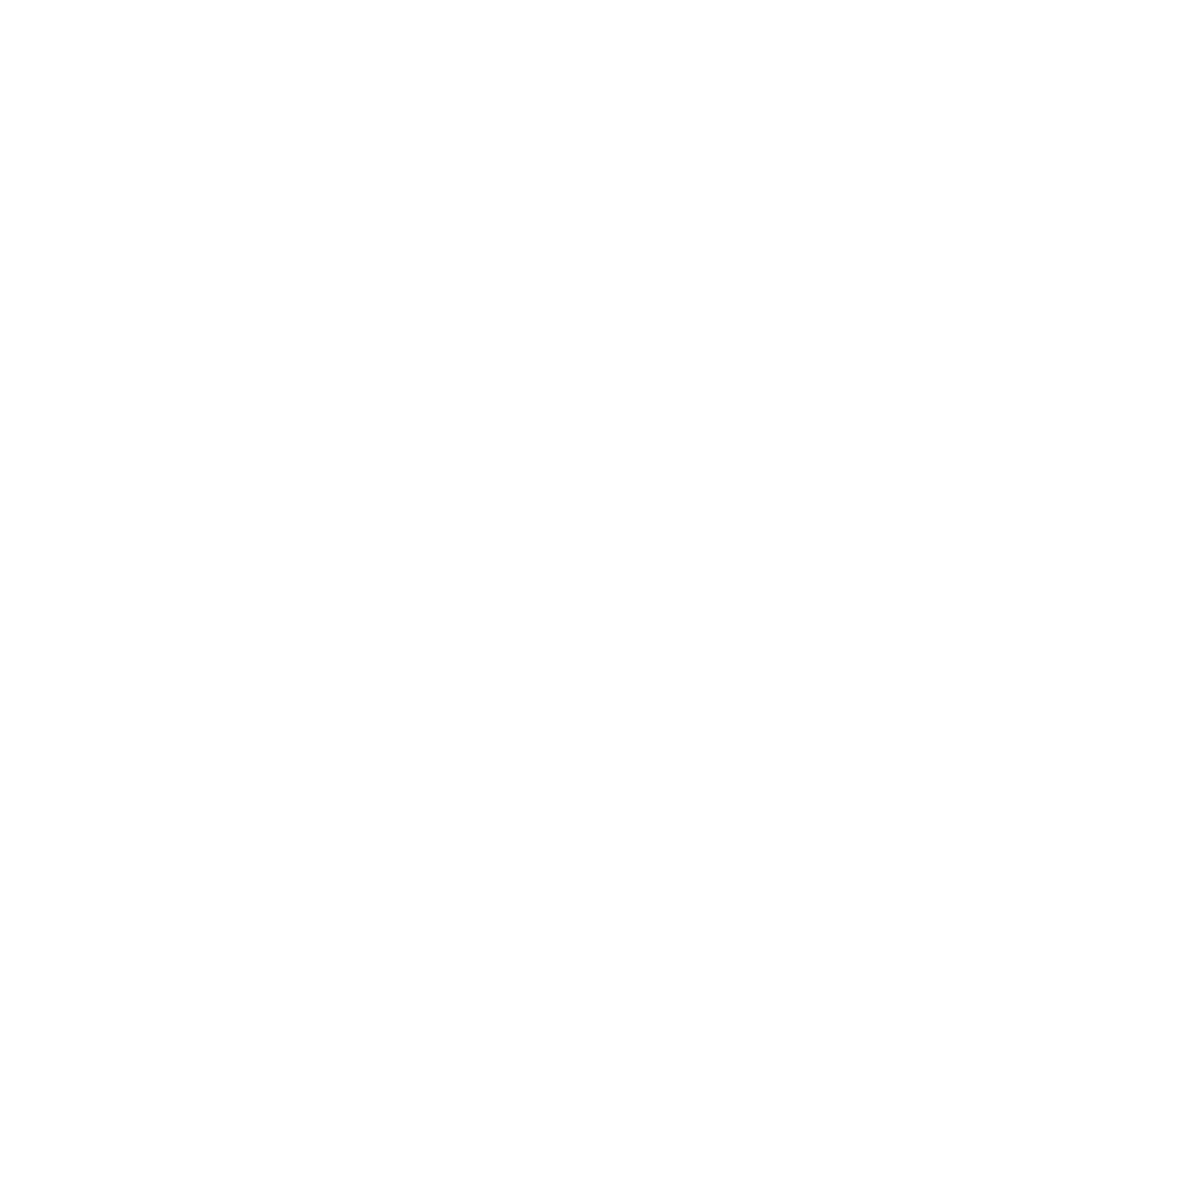

In [4]:
from bs4 import BeautifulSoup

# Read file
with open("ambitionbox_page1.html", "r", encoding="utf-8") as f:
    html_content = f.read()

html_content


In [5]:
soup = BeautifulSoup(html_content , 'html.parser')

In [6]:
soup.find_all('h1')[0].text.strip()

'Companies in India'

In [7]:
for i in soup.find_all('h2'):
    print(i.text.strip())

TCS
Accenture
Wipro
Cognizant
Capgemini
HDFC Bank
Infosys
ICICI Bank
HCLTech
Tech Mahindra
Genpact
Teleperformance
Axis Bank
Concentrix Corporation
Amazon
Jio
iEnergizer
Reliance Retail
IBM
LTIMindtree
Companies by Industry
Companies by Locations
Companies by Type


In [8]:
len(soup.find_all('div' , class_='rating_text'))

20

In [9]:
for rating in soup.find_all('div' , class_='rating_text'):
    print("rating = " , rating.text.strip())

rating =  3.5
rating =  3.7
rating =  3.7
rating =  3.7
rating =  3.7
rating =  3.8
rating =  3.5
rating =  4.0
rating =  3.4
rating =  3.4
rating =  3.7
rating =  3.9
rating =  3.7
rating =  3.7
rating =  4.0
rating =  4.2
rating =  4.7
rating =  3.9
rating =  3.9
rating =  3.7


In [11]:
for review in soup.find_all('span' , class_='companyCardWrapper__companyRatingCount'):
    print("review = " , review.text.strip())

review =  (1L)
review =  (65.9k)
review =  (59.2k)
review =  (56.2k)
review =  (48k)
review =  (45.6k)
review =  (44.3k)
review =  (43.5k)
review =  (41.2k)
review =  (39.5k)
review =  (37.5k)
review =  (33.9k)
review =  (29.5k)
review =  (29.4k)
review =  (28.3k)
review =  (28.1k)
review =  (26.1k)
review =  (25k)
review =  (24.1k)
review =  (23.5k)


In [14]:
company = soup.find_all('div', class_="companyCardWrapper")
print(len(company))

20


In [30]:
names = [];
ratings = [];
reviews = [];
for i in company:
    name = i.find('h2')
    names.append(name.text.strip())
    rating = i.find('div' , class_='rating_text')
    ratings.append(rating.text.strip())
    reviews.append(i.find('span' , class_="companyCardWrapper__companyRatingCount").text.strip());
print(names , '\n', len(names))
print(ratings , '\n', len(ratings))
print(reviews , '\n', len(reviews))

['TCS', 'Accenture', 'Wipro', 'Cognizant', 'Capgemini', 'HDFC Bank', 'Infosys', 'ICICI Bank', 'HCLTech', 'Tech Mahindra', 'Genpact', 'Teleperformance', 'Axis Bank', 'Concentrix Corporation', 'Amazon', 'Jio', 'iEnergizer', 'Reliance Retail', 'IBM', 'LTIMindtree'] 
 20
['3.5', '3.7', '3.7', '3.7', '3.7', '3.8', '3.5', '4.0', '3.4', '3.4', '3.7', '3.9', '3.7', '3.7', '4.0', '4.2', '4.7', '3.9', '3.9', '3.7'] 
 20
['(1L)', '(65.9k)', '(59.2k)', '(56.2k)', '(48k)', '(45.6k)', '(44.3k)', '(43.5k)', '(41.2k)', '(39.5k)', '(37.5k)', '(33.9k)', '(29.5k)', '(29.4k)', '(28.3k)', '(28.1k)', '(26.1k)', '(25k)', '(24.1k)', '(23.5k)'] 
 20


In [32]:
df = pd.DataFrame({'Name':names , 'Rating':ratings , 'Reviews':reviews})
df

,Name,Rating,Reviews
0,TCS,3.5,(1L)
1,Accenture,3.7,(65.9k)
2,Wipro,3.7,(59.2k)
3,Cognizant,3.7,(56.2k)
4,Capgemini,3.7,(48k)
5,HDFC Bank,3.8,(45.6k)
6,Infosys,3.5,(44.3k)
7,ICICI Bank,4.0,(43.5k)
8,HCLTech,3.4,(41.2k)
9,Tech Mahindra,3.4,(39.5k)
